In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.config import get_dataset_and_user
from src.user import DummyUser
%matplotlib inline

In [2]:
# get data
X_iris, user_iris = get_dataset_and_user('iris')
y_iris = user_iris.get_label(X_iris, update_counter=False)

X_housing, user_housing = get_dataset_and_user('housing')
y_housing = user_housing.get_label(X_housing, update_counter=False)

X_sdss, user_sdss = get_dataset_and_user('sdss_Q1.1')

X_cars, user_cars = get_dataset_and_user('user_study_query8')

/Users/luciano/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/luciano/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


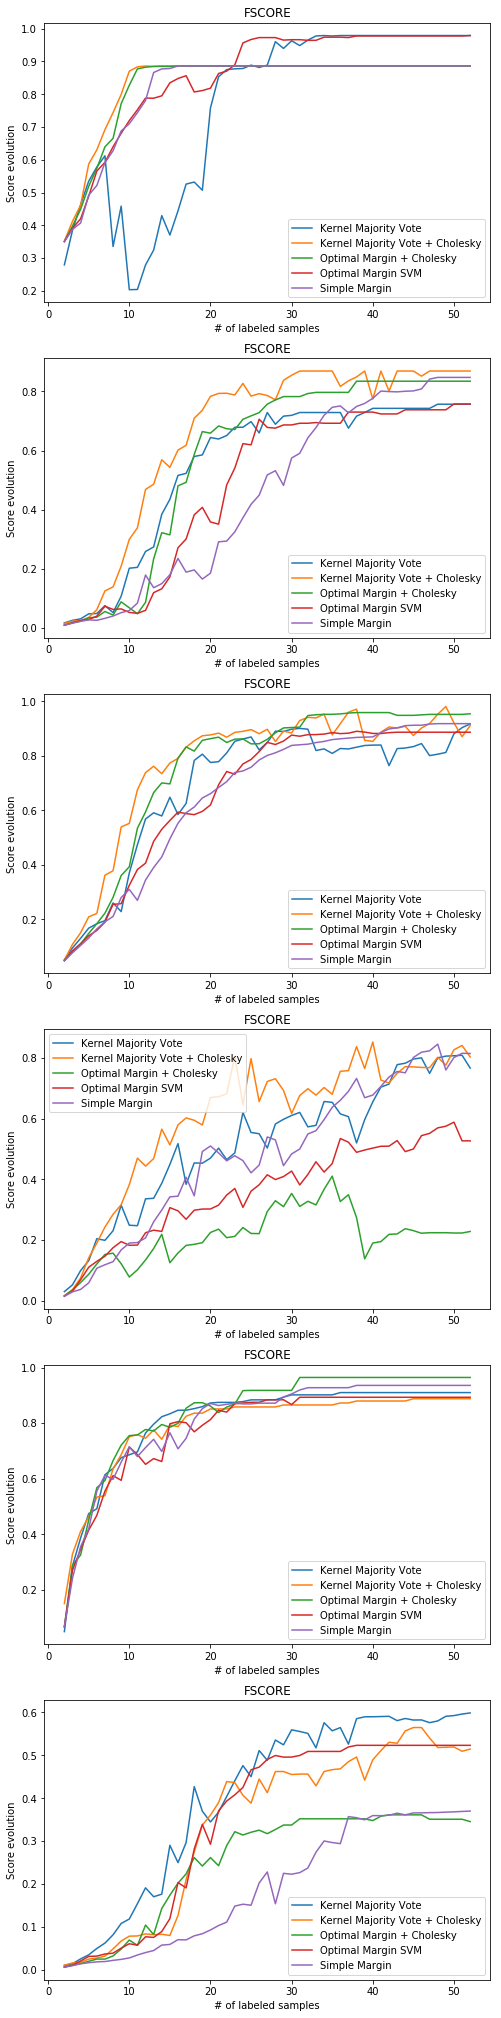

In [4]:
from src.active_learning.svm import SimpleMargin, SolverMethod, OptimalMargin
from src.active_learning.svm.base import OptimalMarginCholesky
from src.active_learning.linear import LinearMajorityVote, KernelMajorityVote, KernelCholeskyMajorityVote
from src.active_learning.agnostic import RandomLearner
from src.showdown import Showdown
from src.plotting import plot_showdown
from src.initial_sampling import StratifiedSampler, EmptySampler
from sklearn.svm import SVC

user_housing.max_iter = 35
user_iris.max_iter = 10
user_sdss.max_iter = 40

active_learners_list = [
    #("random", RandomLearner(SVC(C=100000, kernel='rbf'))),
    ("Simple Margin", SimpleMargin(top=-1, kind='kernel', kernel='rbf', C=100000)),
    ("Optimal Margin SVM", OptimalMargin(top=-1, chain_length=128, sample_size=16, kind='kernel', kernel='rbf', C=100000)),
    ("Optimal Margin + Cholesky", OptimalMarginCholesky(top=-1, chain_length=128, sample_size=16, kind='kernel', kernel='rbf', C=100000)),
    ("Kernel Majority Vote", KernelMajorityVote(top=-1, chain_length=128, sample_size=16)),
    ("Kernel Majority Vote + Cholesky", KernelCholeskyMajorityVote(top=-1, chain_length=128, sample_size=16))
]

datasets_list = []
for i in [1,2,3,7,11,12]:#range(1,13):
    num = str(i)
    if i < 10:
        num = '0' + num
    X, user = get_dataset_and_user('user_study_query' + str(i))
    datasets_list.append(('query ' + num, X, user))

times = 10
showdown = Showdown()
output = showdown.run(datasets_list, active_learners_list, times, StratifiedSampler(1,1))  # StratifiedSampler(1,1)

#from matplotlib.cm import rainbow
#res = output.swaplevel(0,1,axis=1)['fscore'].swaplevel(0,1,axis=1)['simple margin'].swaplevel(0,1,axis=1)['mean']
#res.plot(figsize=(10,8), title='Simple Margin performance over User Study', colormap=rainbow, style='-x')
#plt.xlabel('Iteration')
#plt.ylabel('F-score')

#print(output.head())
plot_showdown(output, metrics_list=['fscore'])

In [ ]:
output['query 01']['fscore']

In [ ]:
output.swaplevel(0,1,axis=1)['fscore'].swaplevel(0,1,axis=1)['simple margin'].swaplevel(0,1,axis=1)['min']

In [ ]:
from datetime import datetime

def point_parser(s):
    s = s[1:-1]  # remove square brackets
    arrays = s.split('\n')
    arrays_without_brackets = map(lambda x: x.strip()[1:-1], arrays)
    final = list(map(lambda x: [float(y) for y in x.split()], arrays_without_brackets))
    return final[0]

def parse_log(path='task.log'):
    with open(path, 'r') as f:
        for line in f:
            timestamp, _, _, _, iteration, point, label = line.strip().split('\t')
            timestamp = datetime.strptime(timestamp, "%Y-%m-%d %H:%M:%S,%f").timestamp()
            point = point_parser(point)
            label = float(label)
            iteration = int(iteration)
            yield timestamp, iteration, point, label

logs = parse_log()            
t0, i0, x0, l0 = next(logs)
points = []
labels = []
for t, i, x, l in logs:
    points.append(x)
    labels.append(l)
    if i != i0:
        i0 = i
        # compute metrics
        pass

print(points)
print(labels)